# Discord Network Analysis of DPS Related Hub Servers - Code Notebook

In this notebook I will be creating node and edge lists that can be imported into Gephi, sentiment analysis, wordclouds, BERTopic modelling, and 

## Imports

The necessary libraries will be imported.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx
import pandas as pd
from transformers import pipeline
import spacy
import json
import os

## Loading Messages

In [2]:
#Flattens the data so that we can access things such as like count from public metrics
def flatten_nested_dicts(df):
    dicts = df.to_dict(orient='records')
    flattened = pd.json_normalize(dicts)
    return flattened

In [3]:
messages = pd.DataFrame()

In [4]:
path_to_json = 'DPD JSON Files/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
  with open(path_to_json + file_name, encoding="utf8") as json_file:
    channel_json = json.load(json_file)
    
    #Turns our json file into a dataframe
    channelinfo = pd.DataFrame(channel_json["channel"], index=[0])
    channelmessages = pd.DataFrame(channel_json["messages"])
    channelmessages['channelName'] = channelinfo["name"].iloc[0]

    messages = pd.concat([messages, channelmessages], ignore_index=True)

In [5]:
path_to_json = 'Cafe JSON Files/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
  with open(path_to_json + file_name, encoding="utf8") as json_file:
    channel_json = json.load(json_file)
    
    #Turns our json file into a dataframe
    channelinfo = pd.DataFrame(channel_json["channel"], index=[0])
    channelmessages = pd.DataFrame(channel_json["messages"])
    channelmessages['channelName'] = channelinfo["name"].iloc[0]

    messages = pd.concat([messages, channelmessages], ignore_index=True)

In [6]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,author,attachments,embeds,stickers,reactions,mentions,reference,channelName,interaction
0,656439818280108033,Default,2019-12-17T10:17:28.74+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,"{'id': '202241333379858443', 'name': 'martino_...",[],[],[],"[{'emoji': {'id': '475788369977278475', 'name'...",[],NaN,anime,NaN
1,656440282325319680,Default,2019-12-17T10:19:19.377+00:00,2019-12-17T10:19:28.168+00:00,None,False,The action was really good and the 3D animatio...,"{'id': '202241333379858443', 'name': 'martino_...",[],[],[],[],[],NaN,anime,NaN
2,656440369218715648,Default,2019-12-17T10:19:40.094+00:00,None,None,False,This channel already exists,"{'id': '75968535074967552', 'name': 'obu_fox',...",[],[],[],[],[],NaN,anime,NaN
3,656440406875045908,Default,2019-12-17T10:19:49.072+00:00,None,None,False,#grindr and #moonrunes-with-shoto,"{'id': '75968535074967552', 'name': 'obu_fox',...",[],[],[],[],[],NaN,anime,NaN
4,656440462781054986,Default,2019-12-17T10:20:02.401+00:00,None,None,False,I made it again 😎,"{'id': '202241333379858443', 'name': 'martino_...",[],[],[],[],[],NaN,anime,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988608,1114764124438679613,Reply,2023-06-04T03:54:38.582+00:00,None,None,False,King,"{'id': '269237401094717462', 'name': 'bastizzl...",[],[],[],[],"[{'id': '336562240268533761', 'name': 'Leadix'...","{'messageId': '1114723506144411688', 'channelI...",😎leadix,NaN
1988609,1114765606353383445,Default,2023-06-04T04:00:31.898+00:00,None,None,False,meet Bast,"{'id': '360912283796373505', 'name': 'daskaise...",[],[],[],[],[],NaN,😎leadix,NaN
1988610,1114771900820881462,Default,2023-06-04T04:25:32.616+00:00,None,None,False,if i see bast I will decapitate him like in hi...,"{'id': '336562240268533761', 'name': 'Leadix',...",[],[],[],[],[],NaN,😎leadix,NaN
1988611,1114798099500650597,Default,2023-06-04T06:09:38.868+00:00,None,None,False,"That’s what Shoto did to me, it’s tradition fo...","{'id': '371009505841905687', 'name': 'Morshu',...",[],[],[],[],[],NaN,😎leadix,NaN


In [7]:
#Flattens our df
messages = flatten_nested_dicts(messages)
messages.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988613 entries, 0 to 1988612
Data columns (total 34 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   id                              1988613 non-null  object 
 1   type                            1988613 non-null  object 
 2   timestamp                       1988613 non-null  object 
 3   timestampEdited                 50598 non-null    object 
 4   callEndedTimestamp              0 non-null        object 
 5   isPinned                        1988613 non-null  bool   
 6   content                         1988613 non-null  object 
 7   attachments                     1988613 non-null  object 
 8   embeds                          1988613 non-null  object 
 9   stickers                        1988613 non-null  object 
 10  reactions                       1988613 non-null  object 
 11  mentions                        1988613 non-null  object 
 12  

In [8]:
messages.to_csv("cafedpd.csv", encoding='utf-8', index=False)
messages.to_json("cafedpd.json")

In [9]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,reference.guildId,interaction.id,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl
0,656439818280108033,Default,2019-12-17T10:17:28.74+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656440282325319680,Default,2019-12-17T10:19:19.377+00:00,2019-12-17T10:19:28.168+00:00,None,False,The action was really good and the 3D animatio...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,656440369218715648,Default,2019-12-17T10:19:40.094+00:00,None,None,False,This channel already exists,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656440406875045908,Default,2019-12-17T10:19:49.072+00:00,None,None,False,#grindr and #moonrunes-with-shoto,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,656440462781054986,Default,2019-12-17T10:20:02.401+00:00,None,None,False,I made it again 😎,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988608,1114764124438679613,Reply,2023-06-04T03:54:38.582+00:00,None,None,False,King,[],[],[],...,710037582054031380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988609,1114765606353383445,Default,2023-06-04T04:00:31.898+00:00,None,None,False,meet Bast,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988610,1114771900820881462,Default,2023-06-04T04:25:32.616+00:00,None,None,False,if i see bast I will decapitate him like in hi...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988611,1114798099500650597,Default,2023-06-04T06:09:38.868+00:00,None,None,False,"That’s what Shoto did to me, it’s tradition fo...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conversation Finder

In [10]:
from datetime import timedelta

In [11]:
# Convert timestamp column to datetime
messages['timestamp'] = pd.to_datetime(messages['timestamp'])

In [12]:
from tqdm import tqdm

# Initialize conversation counter and conversation ID
conversation_counter = 0
conversation_id = 1

# Create a dictionary to map message IDs to conversation IDs
conversation_mapping = {}

# Create a new column for conversation ID
messages['conversation'] = 0

# Get the total number of rows in the DataFrame
total_rows = len(messages)

# Create a progress bar
progress_bar = tqdm(total=total_rows, desc='Processing', unit='row')

# Iterate over each row in the DataFrame
for index, row in messages.iterrows():
    # Update the progress bar
    progress_bar.update(1)

    # Get the timestamp of the current row
    current_timestamp = row['timestamp']
    # Get the reference message ID of the current row
    reference_message_id = row['reference.messageId']
    
    # Check if the current row is a reply to another message
    if pd.notnull(reference_message_id):
        # Check if the referenced message ID exists in the conversation mapping
        if reference_message_id in conversation_mapping:
            # Get the conversation ID of the referenced message
            conversation_id = conversation_mapping[reference_message_id]
            
            # Assign the same conversation ID to the current row
            messages.at[index, 'conversation'] = conversation_id
    
    # Check if the current row is within 15 minutes of the last message
    if index > 0:
        last_timestamp = messages.at[index - 1, 'timestamp']
        time_difference = current_timestamp - last_timestamp
        if time_difference <= timedelta(minutes=15):
            # Assign the same conversation ID as the previous message
            messages.at[index, 'conversation'] = conversation_id
        else:
            # Start a new conversation and update the conversation ID
            conversation_counter += 1
            conversation_id = conversation_counter
            messages.at[index, 'conversation'] = conversation_id

    # Update the conversation mapping with the current message ID and conversation ID
    conversation_mapping[row['id']] = conversation_id

# Close the progress bar
progress_bar.close()

Processing: 100%|██████████| 1988613/1988613 [03:48<00:00, 8687.77row/s]


In [13]:
messages[["content","channelName","conversation"]]

,content,channelName,conversation
0,The Magnificent Kotobuki was pretty fucking lit,anime,0
1,The action was really good and the 3D animatio...,anime,1
2,This channel already exists,anime,1
3,#grindr and #moonrunes-with-shoto,anime,1
4,I made it again 😎,anime,1
...,...,...,...
1988608,King,😎leadix,296365
1988609,meet Bast,😎leadix,296365
1988610,if i see bast I will decapitate him like in hi...,😎leadix,296366
1988611,"That’s what Shoto did to me, it’s tradition fo...",😎leadix,296367


In [14]:
messages.to_csv("cafedpd_conversations.csv", encoding='utf-8', index=False)

In [15]:
messages.to_json("cafedpd_conversations.json")

### Creating an Edge and Node List

In [16]:
messages.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988613 entries, 0 to 1988612
Data columns (total 35 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   id                              1988613 non-null  object             
 1   type                            1988613 non-null  object             
 2   timestamp                       1988613 non-null  datetime64[ns, UTC]
 3   timestampEdited                 50598 non-null    object             
 4   callEndedTimestamp              0 non-null        object             
 5   isPinned                        1988613 non-null  bool               
 6   content                         1988613 non-null  object             
 7   attachments                     1988613 non-null  object             
 8   embeds                          1988613 non-null  object             
 9   stickers                        1988613 non-null  object 

In [17]:
messages["author.name"]

0           martino_
1           martino_
2            obu_fox
3            obu_fox
4           martino_
             ...    
1988608    bastizzle
1988609    daskaiser
1988610       Leadix
1988611       Morshu
1988612       Leadix
Name: author.name, Length: 1988613, dtype: object

In [18]:
#Gets just the author_id and referenced tweets columns from the tweets
subset = messages[['author.id','conversation']].dropna()
subset

,author.id,conversation
0,202241333379858443,0
1,202241333379858443,1
2,75968535074967552,1
3,75968535074967552,1
4,202241333379858443,1
...,...,...
1988608,269237401094717462,296365
1988609,360912283796373505,296365
1988610,336562240268533761,296366
1988611,371009505841905687,296367


In [19]:
# Drop duplicate rows
subset = subset.drop_duplicates()

# Group by conversation and author name
grouped = subset.groupby(['conversation', 'author.id']).size().reset_index()

# Create edge list
edge_list = []

# Iterate over each conversation
for conversation_id, group in grouped.groupby('conversation'):
    authors = group['author.id'].tolist()
    
    # Create edges between authors in the same conversation
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            edge_list.append((authors[i], authors[j]))

In [20]:
edge_data = pd.DataFrame(edge_list, columns=['Source', 'Target'])

In [21]:
edge_data['weight'] = 1
edge_data

,Source,Target,weight
0,202241333379858443,332883294154653696,1
1,202241333379858443,375778650563280898,1
2,202241333379858443,75968535074967552,1
3,332883294154653696,375778650563280898,1
4,332883294154653696,75968535074967552,1
...,...,...,...
524225,232184125648404482,67806201148084224,1
524226,336562240268533761,447066298472464391,1
524227,336562240268533761,67806201148084224,1
524228,447066298472464391,67806201148084224,1


In [22]:
edge_data.to_csv('cafedpd_edge_list.csv',index=False)

In [23]:
author_ids = messages['author.id']
author_names = messages['author.name']
author_color = messages['author.color']
author_nickname = messages['author.nickname']
author_bot = messages['author.isBot']

# Create a DataFrame for the node list
node_df = pd.DataFrame({'ID': list(author_ids), 'Label': list(author_names), 'colour': list(author_color), 'nickname': list(author_nickname), 'bot': list(author_bot)})
node_df = node_df.drop_duplicates()
node_df

,ID,Label,colour,nickname,bot
0,202241333379858443,martino_,#9B59B6,Baby Gronk,False
2,75968535074967552,obu_fox,#9B59B6,Ikuyo Kita,False
22,332883294154653696,MOTHTWINK,#71368A,MOTHTWINK,False
37,375778650563280898,polkavolkan,#3498DB,Savin Yorbacon,False
44,196790819489972225,admiralshoto,#11806A,朋友是一个坚韧不拔的纪录片 (turkophile),False
...,...,...,...,...,...
1690588,843540421693931601,FractalTest #announcement1,None,FractalTest #announcement1,True
1812991,1046603701663584336,almond #daily-hardposting,None,almond #daily-hardposting,True
1855738,800371667250839633,xkcd,None,xkcd,True
1873903,843228400369926145,uh oh server doo doo treble,None,uh oh server doo doo treble,True


In [24]:
# Save the node list as a CSV file compatible with Gephi
node_df.to_csv('cafedpd_node_list.csv', index=False)

## NetworkX, Netwulf Visualisation

In [25]:
from netwulf import visualize

In [26]:
# Some helpful functions

# Sets the size attribute of our graph to whatever scores are passed in - netwulf uses the size attribute to determine node size.
def size_by(G,scores):
    nx.set_node_attributes(G,scores, name='size')
    return G

# netwulf uses the group attribute to determine node color.
def color_by(G, assignment):
    nx.set_node_attributes(G, assignment, name='group')
    return G

def top_n(scores, n=10):
    return pd.Series(scores).sort_values(ascending=False).head(n)

In [27]:
# Some filtering functions

def filter_by_k_core(G, k):
     return nx.k_core(G, k=k)

def filter_by_degree(G, minimum_degree):
    scores = G.degree()
    to_keep = [node for node,degree in scores if degree >= minimum_degree]
    return G.subgraph(to_keep)

def filter_by_giant_component(G):
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(components[0])

In [28]:
# Let's standardise how we generate community labels and measure modularity

def find_communities(G, weight='weight'):
    comms = nx.algorithms.community.louvain_communities(G,weight=weight)
    n_communities = len(comms)
    modularity = nx.algorithms.community.modularity(G,comms,weight='weight')
    assignments = {}
    for com_id, members in enumerate(comms):
        for node in members:
            assignments[node] = com_id
    return assignments, n_communities, modularity

In [29]:
messages_G = nx.from_pandas_edgelist(edge_data, create_using=nx.Graph, source='Source',target='Target')

In [30]:
comms, n_communities, modularity = find_communities(messages_G)

In [31]:
filtered = filter_by_degree(messages_G, 2)
filtered = filter_by_giant_component(filtered)

comms, n_communities, modularity = find_communities(filtered, weight='weight')
print(f'Our network has {n_communities} communities, with a modularity score of {modularity}')

Our network has 3 communities, with a modularity score of 0.17788760559961753


In [32]:
node_df

,ID,Label,colour,nickname,bot
0,202241333379858443,martino_,#9B59B6,Baby Gronk,False
2,75968535074967552,obu_fox,#9B59B6,Ikuyo Kita,False
22,332883294154653696,MOTHTWINK,#71368A,MOTHTWINK,False
37,375778650563280898,polkavolkan,#3498DB,Savin Yorbacon,False
44,196790819489972225,admiralshoto,#11806A,朋友是一个坚韧不拔的纪录片 (turkophile),False
...,...,...,...,...,...
1690588,843540421693931601,FractalTest #announcement1,None,FractalTest #announcement1,True
1812991,1046603701663584336,almond #daily-hardposting,None,almond #daily-hardposting,True
1855738,800371667250839633,xkcd,None,xkcd,True
1873903,843228400369926145,uh oh server doo doo treble,None,uh oh server doo doo treble,True


In [33]:
labels = node_df.set_index('ID')['Label'].to_dict()
labels

{'202241333379858443': 'martino_',
 '75968535074967552': 'obu_fox',
 '332883294154653696': 'MOTHTWINK',
 '375778650563280898': 'polkavolkan',
 '196790819489972225': 'admiralshoto',
 '139821882974142464': 'captainwalker',
 '222825184887963648': 'grindor',
 '105785405089009664': 'abe.5446',
 '183682701532987392': 'revenin',
 '126452068482416641': 'avan.ter',
 '217231896378212352': 'ausfernando',
 '456226577798135808': 'Deleted User',
 '289192931443867649': 'haruhi_is_waifu',
 '186535323080065024': 'mihau',
 '67806201148084224': 'jba',
 '360912283796373505': 'daskaiser',
 '203229662967627777': 'skellia',
 '251760037444321280': 'saintlystorm16',
 '213627387206828032': 'towergame',
 '173058411758485506': 'stevescriggins',
 '244234573376913408': 'Wilhelm',
 '108650600954093568': 'bryanchaos3',
 '92432860887121920': 'phoenix_eternal',
 '447066298472464391': 'amazonPG!',
 '78263060736774144': 'dirtyscoundrel',
 '550700609100316672': 'Blessed',
 '569658732053659665': 'Senti',
 '2692374010947174

In [34]:
filtered

In [35]:
filtered = color_by(filtered,comms)
relabelled = nx.relabel_nodes(filtered, labels)

In [36]:
sorted(relabelled)

['1ntro_',
 '24/7 🔊',
 '5tet',
 'ACE',
 'AlphaQHard',
 'Anon500',
 'Arc Drakius',
 'Ari_Rahika',
 'Aryman',
 'Atomicknight',
 'Avan',
 'Ayana',
 'BREAD',
 'Bass',
 'Bastizzle 2',
 'BelugaOS',
 'Blessed',
 'Bobby B',
 'COVID-19',
 'CRsTwin',
 'Caesaris',
 'Calico',
 'Caption It Jerma!',
 'Carl-bot',
 'Carl-bot Logging',
 'Chess',
 'Chip',
 'Coconut π',
 'Community Updates',
 'Coronavirus (COVID-19)',
 'Covid-19 Tracker',
 'DJ Blob',
 'DPS Season 5: Grave of Twilight of Ages Naivety, Patent Pending #📢server-announc',
 'Dad Bot',
 'Dedhorse',
 'Deleted User',
 'Desk 10',
 'Devilfox',
 'Diwata',
 'Dragon_',
 'Eagle',
 'Emoji Statistics',
 'Empyrean',
 'Explicate',
 'F/Nox',
 'F33dBaCK_PLs',
 'Fezthebear',
 'Flow Music',
 'FractalTest #announcement1',
 'FredBoat♪♪',
 'Friend Time',
 'GNK Droid',
 'Garfield Bot',
 'Gavros963',
 'Godspeed: A Flame for Winter #updates-and-teasers',
 'Grampo Co. #eckva_updates',
 'Groover',
 'Groovy',
 'Helios',
 'Honoria Shana',
 'Hydra',
 'Illuminati Council 

In [37]:
#visualize(size_by(filtered,nx.degree_centrality(filtered)))

In [38]:
#visualize(filtered)

In [39]:
comms_data = pd.Series(comms, name='community')
comms_data

271093643975196672    0
173058411758485506    0
235384042772627466    0
293886730254286849    0
603063596900941825    0
                     ..
699725924890837072    2
346922112700645378    2
372181371864612864    2
194941025276395521    2
222088686781726721    2
Name: community, Length: 266, dtype: int64

In [40]:
comms_data.to_csv('cafedpdCommunities.csv')

In [41]:
comms_data.to_json('cafedpdCommunities.json')

## Sentiment Analysis

In [42]:
get_sentiment = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [43]:
messages_edge_data = nx.from_pandas_edgelist(edge_data, source='Source', target='Target', edge_attr='weight')

In [44]:
communities = nx.algorithms.community.louvain_communities(messages_edge_data, weight = 'weight')

In [45]:
comms_data

271093643975196672    0
173058411758485506    0
235384042772627466    0
293886730254286849    0
603063596900941825    0
                     ..
699725924890837072    2
346922112700645378    2
372181371864612864    2
194941025276395521    2
222088686781726721    2
Name: community, Length: 266, dtype: int64

In [46]:
# Merging together tweet data and community assignments
messages = messages.merge(comms_data,how='left', left_on='author.id', right_index=True)
messages.shape

(1988613, 36)

In [47]:
messages['content'].tolist()

['The Magnificent Kotobuki was pretty fucking lit',
 "The action was really good and the 3D animation wasn't that bad.",
 'This channel already exists',
 '#grindr and #moonrunes-with-shoto',
 'I made it again 😎',
 'Smh',
 'GET RID OF MY BLUE ROLE',
 'naa bro just kick back as blue boy',
 "I'm not part of Blue Labour, damnit",
 'I lead the Monarchical Communist Party',
 'Thotsky is so dumb he called the role "Labor"',
 'Lmao',
 'smh Australians spelling',
 '@MOTHTWINK urbad',
 "I'm up to like episode 111 of the dub version of Black Clover",
 "It's amazing",
 '@Ikuyo Kita You be drinking anything',
 'Not currently',
 "As it's 11:30",
 'bro',
 'you should be drinking all the time',
 'I know, sadly daytime drinking is frowned upon in the office',
 "i didn't call it that",
 'walker did',
 '@Kill, Maim, Burn urbad',
 'Sorry Leon',
 'I was given false information',
 "oh shit that still doesn't make sense",
 "Would I make up for my not daytime drinking by telling you I'm planning a mad turbo J

In [48]:
# Get the number of rows in the DataFrame
num_rows = messages.shape[0]

# Create a list to store every 10th row
every_100th_row = []

# Iterate through the rows and retrieve every 10th row
for i in range(0, num_rows, 100):
    every_100th_row.append(messages.iloc[i])

# Create a new DataFrame from the selected rows
result_df = pd.DataFrame(every_100th_row)

result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community
0,656439818280108033,Default,2019-12-17 10:17:28.740000+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
100,662756990560501805,Default,2020-01-03 20:39:39.979000+00:00,None,None,False,??,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0.0
200,677140349747200011,Default,2020-02-12 13:14:00.039000+00:00,None,None,False,~~and the spin offs~~,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,2.0
300,689569156630446149,Default,2020-03-17 20:21:38.516000+00:00,None,None,False,"I've slightly watched ahead, so don't wait for...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,2.0
400,696120509821222923,Default,2020-04-04 22:14:22.835000+00:00,None,None,False,"LoGH is a great scifi show, even if it does st...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988200,1022629987444072460,Reply,2022-09-22 22:06:28.553000+00:00,None,None,False,I want to snap her neck,"[{'id': '1022629987272118312', 'url': 'https:/...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296259,2.0
1988300,1024154373430980709,Default,2022-09-27 03:03:50.494000+00:00,None,None,False,Disco elysium playthrough,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296267,2.0
1988400,1027433185694461952,Default,2022-10-06 04:12:40.255000+00:00,None,None,False,"also it has more instruments than ""woman moani...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296292,2.0
1988500,1063725764584931369,Default,2023-01-14 07:46:25.346000+00:00,None,None,False,Yeah you get it,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296330,2.0


In [49]:
result_df['sentiment'] = get_sentiment(result_df['content'].tolist(), truncation=True)

In [53]:
label_score = pd.json_normalize(result_df['sentiment'])
result_df = pd.concat([result_df,label_score], axis=1)

In [54]:
result_df.to_csv("cafedpd_sentiment.csv")
result_df.to_json("cafedpd_sentiment.json")

In [55]:
result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community,sentiment,label,score
0,656439818280108033,Default,2019-12-17 10:17:28.740000+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"{'label': 'POS', 'score': 0.9572026133537292}",POS,0.957203
100,662756990560501805,Default,2020-01-03 20:39:39.979000+00:00,None,None,False,??,[],[],[],...,NaN,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.9115056991577148}",NEG,0.980594
200,677140349747200011,Default,2020-02-12 13:14:00.039000+00:00,None,None,False,~~and the spin offs~~,[],[],[],...,NaN,NaN,NaN,NaN,NaN,46.0,2.0,"{'label': 'NEU', 'score': 0.969953179359436}",NEU,0.939792
300,689569156630446149,Default,2020-03-17 20:21:38.516000+00:00,None,None,False,"I've slightly watched ahead, so don't wait for...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,78.0,2.0,"{'label': 'NEU', 'score': 0.9436888694763184}",NEU,0.963133
400,696120509821222923,Default,2020-04-04 22:14:22.835000+00:00,None,None,False,"LoGH is a great scifi show, even if it does st...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,113.0,2.0,"{'label': 'POS', 'score': 0.9895793795585632}",NEG,0.826207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEG,0.923078
19883,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.948442
19884,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.851604
19885,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.720730


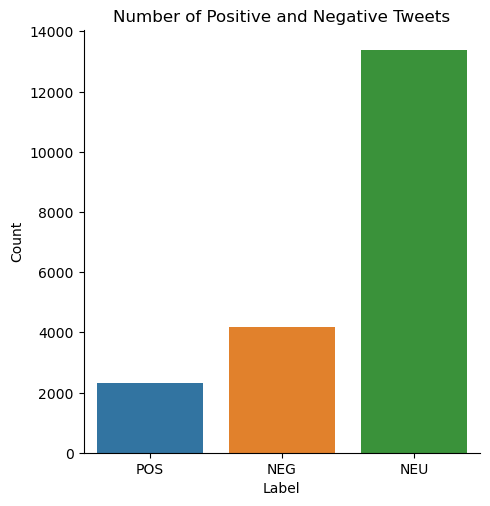

In [56]:
negativeandpositivebarchart = sns.catplot(data=result_df, x='label', kind='count').set(ylabel="Count", xlabel="Label", title="Number of Positive and Negative Tweets")
negativeandpositivebarchart.savefig("negativeandpositivebarchart.png")
negativeandpositivebarchart

## Wordcloud

In [57]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

stopwords = set(STOPWORDS)

In [58]:
# Some settings to make seaborn display better in Jupyter notebook
sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [59]:
cafedpd_messages = pd.read_csv("cafedpd_conversations.csv")

C:\Users\samwi\AppData\Local\Temp\ipykernel_26212\2016011835.py:1: DtypeWarning: Columns (26,28,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  cafedpd_messages = pd.read_csv("cafedpd_conversations.csv")


In [60]:
cafedpd_messages['content'] = cafedpd_messages['content'].fillna('')
corpus = cafedpd_messages['content'].tolist()
corpus

['The Magnificent Kotobuki was pretty fucking lit',
 "The action was really good and the 3D animation wasn't that bad.",
 'This channel already exists',
 '#grindr and #moonrunes-with-shoto',
 'I made it again 😎',
 'Smh',
 'GET RID OF MY BLUE ROLE',
 'naa bro just kick back as blue boy',
 "I'm not part of Blue Labour, damnit",
 'I lead the Monarchical Communist Party',
 'Thotsky is so dumb he called the role "Labor"',
 'Lmao',
 'smh Australians spelling',
 '@MOTHTWINK urbad',
 "I'm up to like episode 111 of the dub version of Black Clover",
 "It's amazing",
 '@Ikuyo Kita You be drinking anything',
 'Not currently',
 "As it's 11:30",
 'bro',
 'you should be drinking all the time',
 'I know, sadly daytime drinking is frowned upon in the office',
 "i didn't call it that",
 'walker did',
 '@Kill, Maim, Burn urbad',
 'Sorry Leon',
 'I was given false information',
 "oh shit that still doesn't make sense",
 "Would I make up for my not daytime drinking by telling you I'm planning a mad turbo J

In [61]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.05, max_df=0.85)
matrix = tfidf.fit_transform(corpus)
matrix_df = pd.DataFrame(matrix.toarray(), columns=tfidf.get_feature_names_out())
matrix_df

,and,https,in,is,it,of,that,the,to,you
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.00000,0.00000,0.0
1,0.473314,0.0,0.0,0.0,0.000000,0.0,0.483688,0.73622,0.00000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0
3,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0
4,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...
1988608,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0
1988609,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0
1988610,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0
1988611,0.000000,0.0,0.0,0.0,0.563265,0.0,0.614076,0.00000,0.55285,0.0


In [62]:
matrix_df.sum().sort_values(ascending=False).head(10)

the      247610.757322
it       151680.597501
to       150114.677648
is       143026.936705
https    117792.005322
you      117136.312413
and      110971.121890
of       110931.670873
that     110120.307082
in        89939.345083
dtype: float64

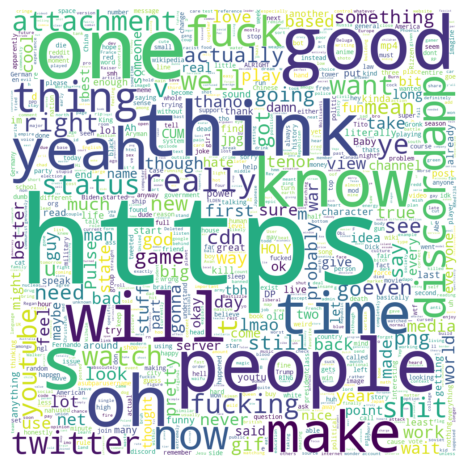

In [63]:
wordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
wordcloud.generate(cafedpd_messages['content'].str.cat(sep=' '))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("cafedpdwordcloud.png", dpi=400)
plt.show()

### Positive and negative sentiment wordclouds

For positive and negative sentiments.

In [65]:
sentiment_messages = pd.read_csv("cafedpd_sentiment.csv")

C:\Users\samwi\AppData\Local\Temp\ipykernel_26212\3268062643.py:1: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,12,14,17,19,20,21,22,27,29,31,32,33,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  sentiment_messages = pd.read_csv("cafedpd_sentiment.csv")


In [66]:
sentiment_messages

,Unnamed: 0,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,...,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community,sentiment,label,score
0,0,6.564398e+17,Default,2019-12-17 10:17:28.740000+00:00,NaN,NaN,False,The Magnificent Kotobuki was pretty fucking lit,[],[],...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"{'label': 'POS', 'score': 0.9572026133537292}",POS,0.957203
1,100,6.627570e+17,Default,2020-01-03 20:39:39.979000+00:00,NaN,NaN,False,??,[],[],...,NaN,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.9115056991577148}",NEG,0.980594
2,200,6.771403e+17,Default,2020-02-12 13:14:00.039000+00:00,NaN,NaN,False,~~and the spin offs~~,[],[],...,NaN,NaN,NaN,NaN,NaN,46.0,2.0,"{'label': 'NEU', 'score': 0.969953179359436}",NEU,0.939792
3,300,6.895692e+17,Default,2020-03-17 20:21:38.516000+00:00,NaN,NaN,False,"I've slightly watched ahead, so don't wait for...",[],[],...,NaN,NaN,NaN,NaN,NaN,78.0,2.0,"{'label': 'NEU', 'score': 0.9436888694763184}",NEU,0.963133
4,400,6.961205e+17,Default,2020-04-04 22:14:22.835000+00:00,NaN,NaN,False,"LoGH is a great scifi show, even if it does st...",[],[],...,NaN,NaN,NaN,NaN,NaN,113.0,2.0,"{'label': 'POS', 'score': 0.9895793795585632}",NEG,0.826207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39570,19882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEG,0.923078
39571,19883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.948442
39572,19884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.851604
39573,19885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.720730


In [76]:
negativemessages = sentiment_messages[(sentiment_messages['label'] == "NEG")]
positivemessages = sentiment_messages[(sentiment_messages['label'] == "POS")]

In [75]:
sentiment_messages.columns

Index(['Unnamed: 0', 'id', 'type', 'timestamp', 'timestampEdited',
       'callEndedTimestamp', 'isPinned', 'content', 'attachments', 'embeds',
       'stickers', 'reactions', 'mentions', 'reference', 'channelName',
       'interaction', 'author.id', 'author.name', 'author.discriminator',
       'author.nickname', 'author.color', 'author.isBot', 'author.avatarUrl',
       'reference.messageId', 'reference.channelId', 'reference.guildId',
       'interaction.id', 'interaction.name', 'interaction.user.id',
       'interaction.user.name', 'interaction.user.discriminator',
       'interaction.user.nickname', 'interaction.user.color',
       'interaction.user.isBot', 'interaction.user.avatarUrl', 'conversation',
       'community', 'sentiment', 'label', 'score'],
      dtype='object')

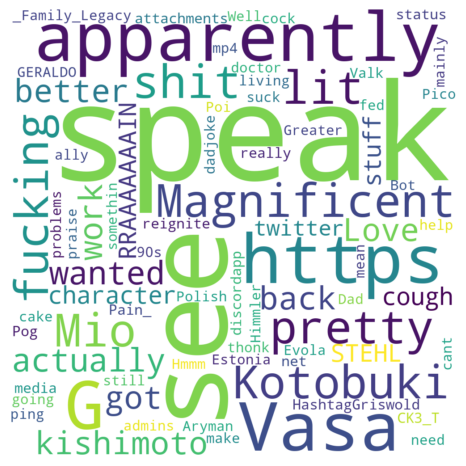

In [77]:
positivewordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
positivewordcloud.generate(positivemessages['content'].str.cat(sep=' '))
plt.imshow(positivewordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("positivewordcloud.png", dpi=400)
plt.show()

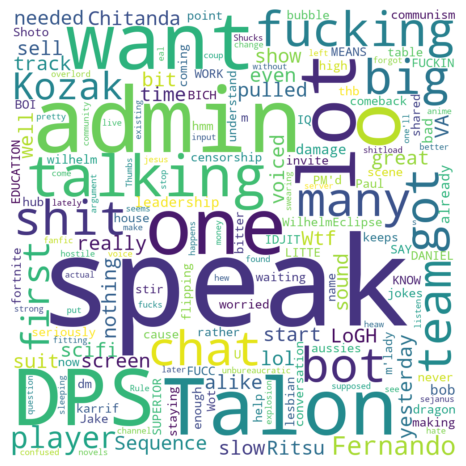

In [78]:
negativewordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
negativewordcloud.generate(negativemessages['content'].str.cat(sep=' '))
plt.imshow(negativewordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("negativewordcloud.png", dpi=400)
plt.show()

## Topic Modelling

In [79]:
from bertopic import BERTopic
import plotly.io as pio
pio.renderers.default = "colab"

In [80]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community
0,656439818280108033,Default,2019-12-17 10:17:28.740000+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,656440282325319680,Default,2019-12-17 10:19:19.377000+00:00,2019-12-17T10:19:28.168+00:00,None,False,The action was really good and the 3D animatio...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
2,656440369218715648,Default,2019-12-17 10:19:40.094000+00:00,None,None,False,This channel already exists,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
3,656440406875045908,Default,2019-12-17 10:19:49.072000+00:00,None,None,False,#grindr and #moonrunes-with-shoto,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,656440462781054986,Default,2019-12-17 10:20:02.401000+00:00,None,None,False,I made it again 😎,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988608,1114764124438679613,Reply,2023-06-04 03:54:38.582000+00:00,None,None,False,King,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296365,2.0
1988609,1114765606353383445,Default,2023-06-04 04:00:31.898000+00:00,None,None,False,meet Bast,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296365,2.0
1988610,1114771900820881462,Default,2023-06-04 04:25:32.616000+00:00,None,None,False,if i see bast I will decapitate him like in hi...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296366,2.0
1988611,1114798099500650597,Default,2023-06-04 06:09:38.868000+00:00,None,None,False,"That’s what Shoto did to me, it’s tradition fo...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296367,2.0


In [86]:
from bertopic.representation import MaximalMarginalRelevance
from sklearn.feature_extraction.text import CountVectorizer

def preprocesser(string:str):
    return [word.lower() for word in string.split() if not word.startswith('@')]

cv = CountVectorizer(stop_words='english', tokenizer=preprocesser, ngram_range=(1,3), min_df=0.05, max_df=0.85)

representation_model = MaximalMarginalRelevance(diversity=1.0)
messages_model = BERTopic(vectorizer_model=cv, representation_model=representation_model, nr_topics="auto", embedding_model='all-MiniLM-L12-v2')

In [87]:
result_df[['content']].head(10)

,content
0,The Magnificent Kotobuki was pretty fucking lit
100,??
200,~~and the spin offs~~
300,"I've slightly watched ahead, so don't wait for..."
400,"LoGH is a great scifi show, even if it does st..."
500,My favourite JoJo is Joseph
600,Is it good? I keep seeing ads for it
700,whats the difference
800,I think
900,It was a really cool movie but they wasted a t...


In [88]:
mask = result_df['content'].str.len() >=1
result_df = result_df.loc[mask]
result_df['content'] = result_df['content'].astype('str')

In [91]:
result_df.reset_index(drop=True, inplace=True)

In [92]:
# Here we tell the model that we want it to consider the community assignments when modelling. This is providing guidance to the model that there should be semantic similarity within communities.

topics, probabilities = messages_model.fit_transform(result_df['content'])

In [93]:
messages_model.get_topic_info()

,Topic,Count,Name
0,-1,6763,-1_time_don't_make_i'm
1,0,7437,0_i'm_mean_going_make
2,1,289,1_ok_okay_alright_time
3,2,197,"2_o_it._it,_feel"
4,3,179,3____
...,...,...,...
131,130,11,130_haha_man_tbh_ok
132,131,11,131_alright_tho_shit_
133,132,11,132_haha_funny_look_going
134,133,11,"133_well,_dont_that's_"


In [94]:
barchart = messages_model.visualize_barchart(n_words=20,height=400,width=500, top_n_topics=5)

In [95]:
barchart.write_html("cafedpdTopicBarchart.html")

In [96]:
barchart.show()

In [97]:
intertopicMap = messages_model.visualize_topics()
intertopicMap.write_html("cafedpdIntertopicMap.html")
intertopicMap.show()

In [98]:
from umap import UMAP
from sentence_transformers import SentenceTransformer

In [99]:
sentence_model = SentenceTransformer('all-MiniLM-L12-v2')
embeddings = sentence_model.encode(messages['content'].tolist(), show_progress_bar=True)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

documentmapchart = messages_model.visualize_documents(messages['content'].tolist(), sample=0.25, reduced_embeddings=reduced_embeddings)

Batches:   0%|          | 0/57774 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
documentmapchart.write_html("cafedpdDocumentMapChart.html")

In [ ]:
documentmapchart.show()

In [103]:
from scipy.cluster import hierarchy as sch
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(result_df['content'].tolist(), y=None)

Batches:   0%|          | 0/578 [00:00<?, ?it/s]

2023-06-11 03:24:36,667 - BERTopic - Transformed documents to Embeddings
2023-06-11 03:24:47,872 - BERTopic - Reduced dimensionality
2023-06-11 03:24:53,067 - BERTopic - Clustered reduced embeddings


In [104]:
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(result_df['content'].tolist(), linkage_function=linkage_function)

100%|██████████| 378/378 [00:05<00:00, 67.34it/s]


In [105]:
hierarchyClusteringChart = messages_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, color_threshold=0.25, width=1000, height=2000)

hierarchyClusteringChart.write_html("cafedpdHierarchyClusteringChart.html")

In [106]:
hierarchyClusteringChart.show()

In [107]:
heatmap = messages_model.visualize_heatmap()
heatmap.write_html("cafedpdHeatmap.html")
heatmap.show()

## Named Entity Recognition

In [108]:
import en_core_web_trf

nlp = en_core_web_trf.load()

In [109]:
def save_displacy_to_html(doc, filename, style='ent'):
    html_data = spacy.displacy.render(doc, style='ent', jupyter=False, page=True)
    with open(filename, 'w+', encoding="utf-8") as f:
        f.write(html_data)

In [110]:
def entity_extractor(nlp_doc, entity_type=None, allow_duplicates=False):
    if entity_type is None:
        ents = [(ent.text,ent.label_) for ent in nlp_doc.ents]
    else:
        ents = [ent.text for ent in nlp_doc.ents if ent.label_ == entity_type.upper()]
    if not allow_duplicates:
        ents = list(set(ents))
    return ents

In [121]:
result_df['content'] = result_df['content'].astype(str)

messagesText = nlp.pipe(result_df['content'])

In [118]:
people = [entity_extractor(content,'person') for content in messagesText]
people

[]

In [ ]:
peopleDF = pd.DataFrame(people)
peopleDF.to_csv('cafedpdPeopleEntities.csv') 

In [ ]:
#peopleDF = pd.read_csv('cafedpdPeopleEntities.csv')
people = peopleDF.values.tolist()

In [ ]:
result_df['people'] = people
result_df['people']

In [ ]:
print(f"****Top 10 People****")
print(messages['people'].value_counts()[:10])
print()

In [ ]:
top_people = people_data.groupby('people',as_index=False).count()
top_people

In [ ]:
toppeoplechart = sns.catplot(data=top_people, y='people',x='communities', kind='bar', height=5, aspect=2).set(xlabel='Freq', ylabel='Person', title='5 Most Mentioned People').set(ylabel="People", xlabel="Mentions", title='5 Most Mentioned People')
toppeoplechart.savefig("toppeoplechart.png")

In [122]:
import networkx as nx
import pandas as pd
from transformers import pipeline
import spacy
import plotly.express as px

In [123]:
get_emotions = pipeline("text-classification", model='j-hartmann/emotion-english-distilroberta-base', top_k=None)

In [129]:
get_primary_emotion = pipeline("text-classification", model='j-hartmann/emotion-english-distilroberta-base', top_k=1)

In [124]:
result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community,sentiment,label,score
0,656439818280108033,Default,2019-12-17 10:17:28.740000+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,"{'label': 'POS', 'score': 0.9572026133537292}",POS,0.957203
1,662756990560501805,Default,2020-01-03 20:39:39.979000+00:00,None,None,False,??,[],[],[],...,NaN,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.9115056991577148}",NEG,0.980594
2,677140349747200011,Default,2020-02-12 13:14:00.039000+00:00,None,None,False,~~and the spin offs~~,[],[],[],...,NaN,NaN,NaN,NaN,NaN,46.0,2.0,"{'label': 'NEU', 'score': 0.969953179359436}",NEU,0.939792
3,689569156630446149,Default,2020-03-17 20:21:38.516000+00:00,None,None,False,"I've slightly watched ahead, so don't wait for...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,78.0,2.0,"{'label': 'NEU', 'score': 0.9436888694763184}",NEU,0.963133
4,696120509821222923,Default,2020-04-04 22:14:22.835000+00:00,None,None,False,"LoGH is a great scifi show, even if it does st...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,113.0,2.0,"{'label': 'POS', 'score': 0.9895793795585632}",NEG,0.826207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,1022629987444072460,Reply,2022-09-22 22:06:28.553000+00:00,None,None,False,I want to snap her neck,"[{'id': '1022629987272118312', 'url': 'https:/...",[],[],...,NaN,NaN,NaN,NaN,NaN,296259.0,2.0,"{'label': 'NEG', 'score': 0.9230778813362122}",NaN,NaN
18479,1024154373430980709,Default,2022-09-27 03:03:50.494000+00:00,None,None,False,Disco elysium playthrough,[],[],[],...,NaN,NaN,NaN,NaN,NaN,296267.0,2.0,"{'label': 'NEU', 'score': 0.948441743850708}",NaN,NaN
18480,1027433185694461952,Default,2022-10-06 04:12:40.255000+00:00,None,None,False,"also it has more instruments than ""woman moani...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,296292.0,2.0,"{'label': 'NEU', 'score': 0.8516036868095398}",NaN,NaN
18481,1063725764584931369,Default,2023-01-14 07:46:25.346000+00:00,None,None,False,Yeah you get it,[],[],[],...,NaN,NaN,NaN,NaN,NaN,296330.0,2.0,"{'label': 'NEU', 'score': 0.720729649066925}",NaN,NaN


In [126]:
# Merging together tweet data and community assignments
result_df = result_df.merge(comms_data,how='left', left_on='author.id', right_index=True)
result_df.shape

(18483, 40)

In [127]:
result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community_x,sentiment,label,score,community_y
0,656439818280108033,Default,2019-12-17 10:17:28.740000+00:00,None,None,False,The Magnificent Kotobuki was pretty fucking lit,[],[],[],...,NaN,NaN,NaN,NaN,0.0,0.0,"{'label': 'POS', 'score': 0.9572026133537292}",POS,0.957203,0.0
1,662756990560501805,Default,2020-01-03 20:39:39.979000+00:00,None,None,False,??,[],[],[],...,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.9115056991577148}",NEG,0.980594,0.0
2,677140349747200011,Default,2020-02-12 13:14:00.039000+00:00,None,None,False,~~and the spin offs~~,[],[],[],...,NaN,NaN,NaN,NaN,46.0,2.0,"{'label': 'NEU', 'score': 0.969953179359436}",NEU,0.939792,2.0
3,689569156630446149,Default,2020-03-17 20:21:38.516000+00:00,None,None,False,"I've slightly watched ahead, so don't wait for...",[],[],[],...,NaN,NaN,NaN,NaN,78.0,2.0,"{'label': 'NEU', 'score': 0.9436888694763184}",NEU,0.963133,2.0
4,696120509821222923,Default,2020-04-04 22:14:22.835000+00:00,None,None,False,"LoGH is a great scifi show, even if it does st...",[],[],[],...,NaN,NaN,NaN,NaN,113.0,2.0,"{'label': 'POS', 'score': 0.9895793795585632}",NEG,0.826207,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,1022629987444072460,Reply,2022-09-22 22:06:28.553000+00:00,None,None,False,I want to snap her neck,"[{'id': '1022629987272118312', 'url': 'https:/...",[],[],...,NaN,NaN,NaN,NaN,296259.0,2.0,"{'label': 'NEG', 'score': 0.9230778813362122}",NaN,NaN,2.0
18479,1024154373430980709,Default,2022-09-27 03:03:50.494000+00:00,None,None,False,Disco elysium playthrough,[],[],[],...,NaN,NaN,NaN,NaN,296267.0,2.0,"{'label': 'NEU', 'score': 0.948441743850708}",NaN,NaN,2.0
18480,1027433185694461952,Default,2022-10-06 04:12:40.255000+00:00,None,None,False,"also it has more instruments than ""woman moani...",[],[],[],...,NaN,NaN,NaN,NaN,296292.0,2.0,"{'label': 'NEU', 'score': 0.8516036868095398}",NaN,NaN,2.0
18481,1063725764584931369,Default,2023-01-14 07:46:25.346000+00:00,None,None,False,Yeah you get it,[],[],[],...,NaN,NaN,NaN,NaN,296330.0,2.0,"{'label': 'NEU', 'score': 0.720729649066925}",NaN,NaN,2.0


In [130]:
result_df['emotions'] = get_emotions(result_df['content'].tolist(), truncation=True)
result_df['primary_emotion'] = get_primary_emotion(result_df['content'].tolist(), truncation=True)
result_df

KeyboardInterrupt: 

In [ ]:
label_score = pd.json_normalize(result_df['emotions'])
label_score

In [ ]:
result_df = pd.concat([result_df,label_score], axis=1)
result_df

In [ ]:
result_df = result_df.rename(columns={0:"Fear",1:"Anger",2:"Surprise",3:"Neutral",4:"Sadness",5:"Joy",6:"Disgust"})
result_df.columns

In [ ]:
fear_score = pd.json_normalize(result_df["Fear"])
result_df = pd.concat([result_df,fear_score], axis=1)
result_df = result_df.rename(columns={"label":"Fear Label","score":"Fear Score"})

anger_score = pd.json_normalize(result_df["Anger"])
result_df = pd.concat([result_df,anger_score], axis=1)
result_df = result_df.rename(columns={"label":"Anger Label","score":"Anger Score"})

Surprise_score = pd.json_normalize(result_df["Surprise"])
result_df = pd.concat([result_df,Surprise_score], axis=1)
result_df = result_df.rename(columns={"label":"Surprise Label","score":"Surprise Score"})

Neutral_score = pd.json_normalize(result_df["Neutral"])
result_df = pd.concat([result_df,Neutral_score], axis=1)
result_df = result_df.rename(columns={"label":"Neutral Label","score":"Neutral Score"})

Sadness_score = pd.json_normalize(result_df["Sadness"])
result_df = pd.concat([result_df,Sadness_score], axis=1)
result_df = result_df.rename(columns={"label":"Sadness Label","score":"Sadness Score"})

Joy_score = pd.json_normalize(result_df["Fear"])
result_df = pd.concat([result_df,Joy_score], axis=1)
result_df = result_df.rename(columns={"label":"Joy Label","score":"Joy Score"})

Disgust_score = pd.json_normalize(result_df["Disgust"])
result_df = pd.concat([result_df,Disgust_score], axis=1)
result_df = result_df.rename(columns={"label":"Disgust Label","score":"Disgust Score"})

result_df

In [ ]:
primary_label_score = pd.json_normalize(result_df['primary_emotion'])
primary_label_score

In [ ]:
result_df = pd.concat([result_df,primary_label_score], axis=1)
result_df

In [ ]:
result_df = result_df.rename(columns={0:"Primary Emotion"})
result_df

In [ ]:
primary_emotion_score = pd.json_normalize(result_df["Primary Emotion"])
result_df = pd.concat([result_df,primary_emotion_score], axis=1)
result_df = result_df.rename(columns={"label":"Primary Emotion Label","score":"Primary Emotion Score"})
result_df

In [ ]:
result_df.to_csv("cafedpd_emotion.csv")

In [ ]:
result_df = pd.read_csv('cafedpd_emotion.csv')
result_df

In [ ]:
emotionbarchart = sns.catplot(data=result_df, x='Primary Emotion Label', kind='count').set(title="Count of Messages by Emotion", xlabel="Count", ylabel="Emotion")
emotionbarchart.savefig("emotionbarchart.png")
emotionbarchart

In [ ]:
top_5_communities = result_df['communities'].value_counts().head().index
top_5_communities

In [ ]:
sample = result_df[result_df['communities'].isin(top_5_communities)].copy() # We use .copy to make it a new object rather than a view as we'll probably change this df later
sample

In [ ]:
sample.columns

In [ ]:
pd.crosstab(sample['communities'], sample['Primary Emotion Label'])

In [ ]:
emotioncommunitybarchart = sns.catplot(data=sample, y='communities',hue='Primary Emotion Label', kind='count',order=top_5_communities).set(ylabel="Communities", xlabel="Count", title='Emotion of Messages ordered by Community Tweet frequency')
emotioncommunitybarchart.savefig("emotioncommunitybarchart.png")
emotioncommunitybarchart

In [ ]:
sample.groupby('communities')['Primary Emotion Score'].describe()

In [ ]:
communityemotionscorechart = sns.catplot(data=sample, x='communities', y='Primary Emotion Score',kind='box', hue='Primary Emotion Label', aspect=2,order=top_5_communities).set(ylabel="Emotion Score", xlabel="Communities", title='Communities by Emotion Score')
communityemotionscorechart.savefig("communityemotionscorechart.png")
communityemotionscorechart

In [ ]:
confidence_data = sample[['communities','Primary Emotion Label','Primary Emotion Score']].groupby(['communities','Primary Emotion Label']).mean().unstack()
confidence_data

In [ ]:
sns.heatmap(data=confidence_data, annot=True, linewidths=0.3,  cmap='coolwarm',vmin=0.5, vmax=1)

In [ ]:
heatmapofemotionscorebycommunitychart = sns.heatmap(data=confidence_data, annot=True, linewidths=0.3,  cmap='coolwarm',vmin=0.5, vmax=1)
heatmapofemotionscorebycommunitychart.set(ylabel="Communities", xlabel="Score - Emotion", title='Heatmap of Message Emotion by Communities')
heatmapofemotionscorebycommunitychart = heatmapofemotionscorebycommunitychart.get_figure()
heatmapofemotionscorebycommunitychart.savefig("heatmapofemotionscorebycommunitychart.png")

In [ ]:
heatmapofemotionscorebycommunitychart

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=result_df, row="Primary Emotion Label", hue="Primary Emotion Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Primary Emotion Score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Primary Emotion Score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Primary Emotion Score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
g.show()

In [ ]:
g.get_figure()

In [ ]:
g

In [ ]:
result_df.columns

In [ ]:
subset = result_df
subset['created_at'] = pd.to_datetime(subset['created_at'])
subset = subset[(subset['created_at'].dt.year == 2023) & (subset['created_at'].dt.day >= 15)]

In [ ]:
fig = px.scatter(subset, height=1000, x=subset["created_at"], log_y=True, y=subset["public_metrics.like_count"], color=subset["Primary Emotion Label"])
fig.show()

In [ ]:
emotioncounts = [len(result_df[result_df["Primary Emotion Label"] == "fear"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "anger"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "surprise"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "neutral"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "sadness"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "joy"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "disgust"])]
emotioncounts

In [ ]:
colors = []
fig = px.pie(result_df, values=emotioncounts, names=["Fear","Anger","Surprise","Neutral","Sadness","Joy","Disgust"], title='Pie chart of Messages by Emotion', height=750)
fig.update_traces(textposition='inside', textinfo='percent+label+value', marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()